In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [11]:
def adjusted_r_squared(r_squared, n, p):
    """
    Calculate adjusted R-squared.

    Parameters:
    - r_squared (float): The coefficient of determination (R-squared).
    - n (int): The number of observations.
    - p (int): The number of predictors (independent variables).

    Returns:
    - adjusted_r_squared (float): The adjusted R-squared value.
    """
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return adjusted_r_squared

In [37]:
#getting the features and the target variables
X, y = load_diabetes(return_X_y=True)

X = X[:, np.newaxis, 2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
sample_size, num_features = X.shape
#create a linear regression model
model = linear_model.LinearRegression()

#train the model using the training sets
model.fit(X_train,y_train)

#make predictions using the testing dataset
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"""Some Stats are:-\n
Coefficient for this one feature: {model.coef_} and intercept = {model.intercept_}\n
Mean square Error = {mse}
Coefficient of Determination (r^2) = {r2}
Adjusted-r2 = {adjusted_r_squared(r2,sample_size,num_features)}
""")

Some Stats are:-

Coefficient for this one feature: [998.57768914] and intercept = 152.00335421448167

Mean square Error = 4061.8259284949268
Coefficient of Determination (r^2) = 0.23335039815872138
Adjusted-r2 = 0.2316080126999912



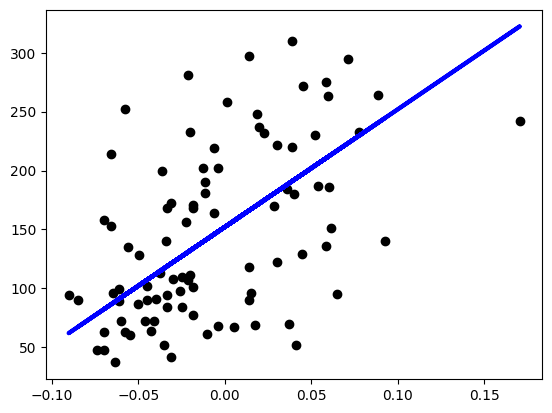

In [39]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.show()